In [1]:
import numpy as np
import matplotlib.pyplot as plt


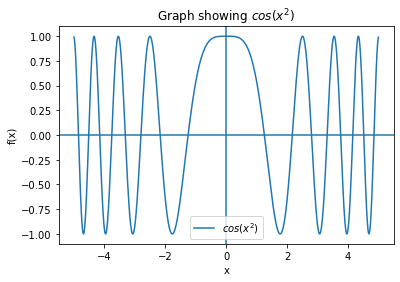

In [27]:
#1a)

def cos_x_sqr(x):
    """
    Evaluates the function cos(x^2)
    Inputs:
        x - the value to evaluate the function at
    Outputs:
        cos(x^2) at the point x
    """    
    return np.cos(x**2)

#1b)

x_1b = np.linspace(-5,5, 1000)
fun_x = cos_x_sqr(x_1b)

plt.plot(x_1b, fun_x, label=r"$cos(x^2)$")
plt.legend()
plt.title(r"Graph showing $cos(x^2)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline()
plt.axvline()

In [28]:
#2a)
def bisect(function, a, b, tol):
    """
    Uses the biscet algorithm to attempt to find a root to the given function
    between the given bounds to a given tolerance
    Inputs:
        function - The function that we wish to find the roots of
        a,b - The lower and upper bounds the function will search within
        tol - The tolerance that algorithm works to, returned solution will be 
            +-tol of the true solution
    Outputs:
        i - the number of iterations taken to find solution
        c - the calculated root of the given equation between the supplied bounds
    """
    #Find first point of bisect and initiate values 
    c = (a+b)/2
    f_a = function(a)
    f_b = function(b)    
    fun_c = function(c)
    
    #Create counter for purpose of function analysis
    i=0
    
    #Continue the process until our solution is 0+-tol
    while np.abs(fun_c)>tol:
        i+=1
        #Set a or b equal to c based on whichever has the same sign 
        if(fun_c*f_a > 0):
            a=c
            f_a = fun_c
        else:
            b=c
            f_b=fun_c
        #Recalculate out values for c and function(c)
        c=(a+b)/2
        fun_c = function(c)
    #Return the root of the equation
    return i,c

#2b)
i, root = bisect(cos_x_sqr, 1, 1.5, 1e-6)
print("root found at x=",root, " after ", i, "iterations")

root found at x= 1.2533140182495117  after  18 iterations


-0.005005005005005003 0.005005005005005003


Text(0.5, 1.0, 'Square wave')

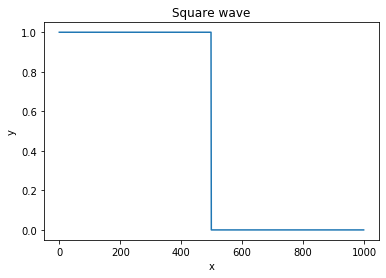

In [3]:
#3a)
#Define x array
x_3a = np.linspace(-5,5, 1000)

#Create empty array for square wave
f_sqr = np.zeros(1000)

#Print x_3a to check point at which x<0
print(x_3a[499], x_3a[500])

#Set x<0 to x, plot to check
f_sqr[0:499] = 1
plt.plot(f_sqr)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Square wave")

Text(0.5, 1.0, 'Absolute value of the fourier transform of our square wave')

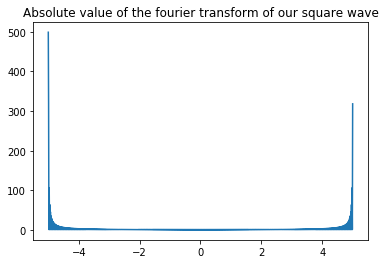

In [4]:
#Find fourier transform of square wave, and plot the magnitude
fft = np.fft.fft(f_sqr)
plt.plot(x_3a, np.abs(fft))
plt.title("Absolute value of the fourier transform of our square wave")

Text(0.5, 1.0, 'Inverse of our fourier transform square wave')

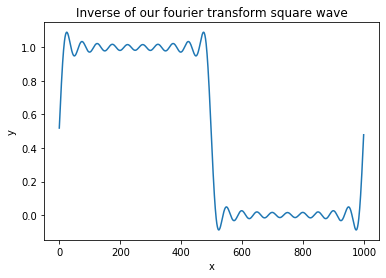

In [5]:
#Set middle values to 0
fft[21:-20] = 0
#Find inverse fourier and plot real part
ifft = np.fft.ifft(fft)
plt.plot(np.real(ifft))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Inverse of our fourier transform square wave")

We do not see a perfect square wave. This is because a square wave can only be represented by an infinite sum of continuous sinodual functions. As a result, we see an imperfect square wave.

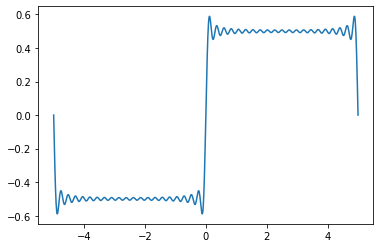

In [32]:
#4a
def square_wave(x, L, N):
    """
    Calculates a square wave by summing N sin terms
    Inputs:
        x - The point at which to evaluate the square wave at
        L - The periodicity of the wave (periodic from -L->L)
        N - The number of iterations to sum for
    Outputs:
        Square wave at (or over range of) x, with periodicity from -L->L
    """
    sqr_wave = 0
    
    for n in range(N):
        n_ = 1+2*n
        sqr_wave += np.sin((n_*np.pi*x)/L)/n_
    sqr_wave *= (2/np.pi)
    return sqr_wave
#4b
x_4a = np.linspace(-5,5, 1000)

sqr_wave = square_wave(x_4a, 5, 21)
plt.plot(x_4a, sqr_wave)

We see that the two methods produce roughly consistent results, but with a swapping of sign.

For dt= 1  a total of  28.2100197582079 iodine atoms remain
For dt= 0.5  a total of  29.028125843908896 iodine atoms remain
For dt= 0.1  a total of  29.66383046905817 iodine atoms remain
For dt= 0.05  a total of  29.742161880590864 iodine atoms remain
For dt= 0.01  a total of  29.804649273656466 iodine atoms remain


Text(0, 0.5, 'N')

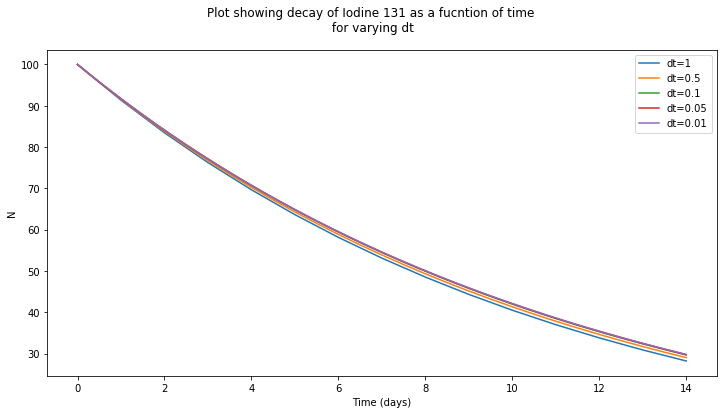

In [33]:
#5a)


def EulerIodineDecay(N0, dt, N, lam):
    """
    Solves the differential equation dN/dT=-lam*N representing the decay of iodine 131
    Inputs:
        N0 - initial population of iodine
        dt - the time step between each iteration
        N - The number of iterations to simulate over
        lam - constant relating to half life, lam=log(2)/t_half
    Outputs:
        sol - Array like, number of particles over time
    """
    #Set up empty array for solutions
    sol = np.zeros(N+1)
    #Set first value
    sol[0] = N0
    #Run Eulers method
    for i in range(N):
        sol[i+1] = sol[i] - dt*lam*sol[i]
    return sol

#Set up system constants
N0 = 100
t_half = 8.02
lam = np.log(2)/t_half
#Create plot
fig = plt.figure(figsize=(12,6))
plot = fig.add_subplot(111)
#Iterate over varying values of dt
for dt in [1, 0.5, 0.1, 0.05, 0.01]:
    
    time = np.arange(0, 14+dt, dt)
    sol = EulerIodineDecay(N0, dt, len(time)-1, lam)
    plot.plot(time, sol, label="dt=" + str(dt))
    print("For dt=",dt, " a total of ", sol[-1], "iodine atoms remain")
fig.suptitle("Plot showing decay of Iodine 131 as a fucntion of time\n for varying dt")
plot.legend()
plot.set_xlabel("Time (days)")
plot.set_ylabel("N")

Text(0.5, 1.0, 'Decay of iodine 131 over time')

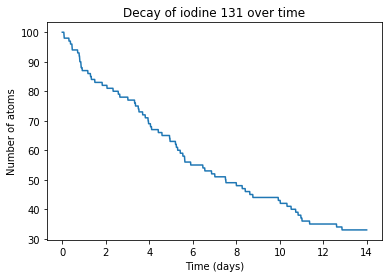

In [34]:
#6a

def iodine_decay(N0, dt, lam, N):
    """
    Calculates the population of iodine atoms over time by checking 
    if each atom decays at each time step
    Inputs:
        N0 - initial population of iodine
        dt - the time step between each iteration
        lam - constant relating to half life, lam=log(2)/t_half
        N - Number of time steps to iterate over
    Outputs:
        pops - The number of atoms at each time step
    """
    p = 1-np.exp(-lam*dt)
    pops = np.zeros(N).astype(int)
    pops[0] = N0
    for t in range(N-1):
        
        for n in range(pops[t]):
            ran = np.random.random()
            if(np.random.random() > p):
                pops[t+1]+=1
    return pops

dt = 0.01
time = np.arange(0, 14+dt, dt)

pops = iodine_decay(100, dt, lam,len(time))
        
plt.plot(time, pops)
plt.xlabel("Time (days)")
plt.ylabel("Number of atoms")
plt.title("Decay of iodine 131 over time")

After 1000 experiments, an average of  9.900990099009901 atoms remain


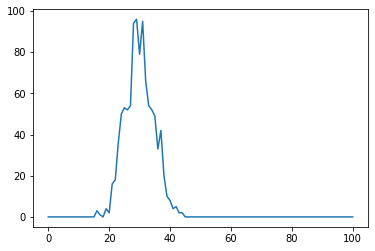

In [35]:
#6b

remaining = np.zeros(101)

for t in range(1000):
    result = iodine_decay(100, dt, lam, len(time))
    fin_pop = result[-1]
    remaining[fin_pop]+=1
    
plt.plot(remaining)


In [39]:


mean = np.mean(remaining)

print("After 1000 experiments, an average of ", mean, "atoms remain")

After 1000 experiments, an average of  9.900990099009901 atoms remain


Something about how i have set up my arrays means that the numpy.mean function gives an incorrect result, as we can see from the plotted graph that the true mean lies at roughly 30, as we expect

Text(0.5, 1.0, '$\\psi_0(x)$')

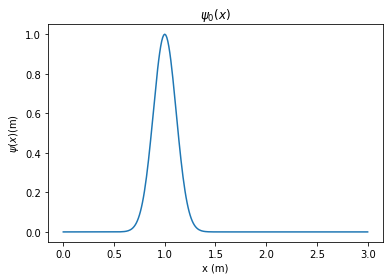

In [40]:

#7a)
def UpdateWave1D(theta_n, theta_nm1, r):
    """
    Calculates the value of theta at the next time step based on the 
    previous two time steps
    Inputs:
        theta_n - array like, The wave at the previous time step
        theta_nm1 - array like, the wave from two time steps previous
        r - constant/array like, the value of r at the given position of the wave
    Outputs:
        theta_np1 - The wave at the next time step.
    """
    #Calculate second order differential
    theta_ip1 = np.roll(theta_n, 1)
    theta_im1 = np.roll(theta_n,-1)
    theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 * (theta_ip1 + theta_im1)
    
    #Set end points of the system to 0, to prevent wave travelling through boundS
    theta_np1[0]=theta_np1[-1]=0
    return theta_np1

#7b
#Set up arrays and initial wave
dx = 0.01
x_7a = np.arange(0, 3+dx, dx)

alpha = 4*np.pi**2
x0 = 1

psi_x0 = np.exp(-alpha*(x_7a-x0)**2)
#Plot initial wave to check
plt.plot(x_7a, psi_x0)
plt.xlabel("x (m)")
plt.ylabel(r"$\psi(x)$(m)")
plt.title(r"$\psi_0(x)$")

Text(0, 0.5, 'time (s)')

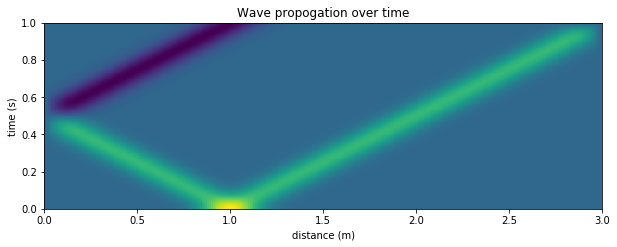

In [41]:
#7c)

#Set up wave and system chatacteristics
vel = 2
r = 0.5
dt = r*dx/vel
time = np.arange(0, 1+dt, dt)

#Create list to hold solutions over time
time_sol = [psi_x0, psi_x0]

#Iterate through time and add to lsit
for t in range(1, len(time)):
    time_sol.append(UpdateWave1D(time_sol[t], time_sol[t-1], r))

#Turn list to NumPy array so we can plot it
time_sol = np.array(time_sol)
#Plot wave over time
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(time_sol, origin='lower', extent=(0,3,0,1))
ax.set_title("Wave propogation over time")
ax.set_xlabel("distance (m)")
ax.set_ylabel("time (s)")

In [43]:
#7d)

def UpdateWave1D_extra(theta_n, theta_nm1, r, c, gamma, dx):    
    """
    Calculates the value of theta at the next time step based on the 
    previous two time steps, and then adds the requried extra RHS term
    Inputs:
        theta_n - array like, The wave at the previous time step
        theta_nm1 - array like, the wave from two time steps previous
        r - constant/array like, the value of r at the given position of the wave
        c - the velocity of the wave
        gamma - a constant
        dx - seperation between x points
    Outputs:
        theta_np1 - The wave at the next time step.
    """
    #Calculate second order differential
    theta_ip1 = np.roll(theta_n, 1)
    theta_im1 = np.roll(theta_n,-1)
    
    theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 * (theta_ip1 + theta_im1) + gamma * c*c * (theta_ip1-theta_im1)/(2*dx)
    #Set boundary conditions
    theta_np1[0]=theta_np1[-1]=0
    return theta_np1


The centred difference approach is found by the following equation:
$$\frac{df}{dx} = \frac{f(x+dx) - f(x-dx)}{2dx}$$
With numpy arrays, we are able to roll the whole array 1 index left and right to find our values of $f(x+dx)$ and  $f(x-dx)$ with high efficiency.
We then use this to find the required term.

C:\Users\nikit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in true_divide
C:\Users\nikit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in multiply
C:\Users\nikit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
C:\Users\nikit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in subtract
C:\Users\nikit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
C:\Users\nikit\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in add


Text(0, 0.5, 'time (s)')

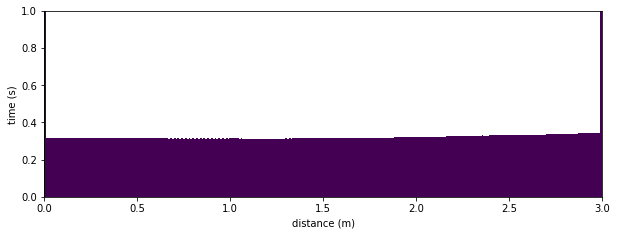

In [44]:
#Set up wave and system chatacteristics
vel = 2
r = 0.5
dt = r*dx/vel
time = np.arange(0, 1+dt, dt)

#Create list to hold solutions over time
time_sol = [psi_x0, psi_x0]

#Iterate through time and add to lsit
for t in range(1, len(time)):
    time_sol.append(UpdateWave1D_extra(time_sol[t], time_sol[t-1], r, vel, 1, dx))

time_sol = np.array(time_sol)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(time_sol, origin='lower', extent=(0,3,0,1))
ax.set_xlabel("distance (m)")
ax.set_ylabel("time (s)")

In [45]:
#8a

def LJ_force(pos, N, sigma, epsilon):
    """
    Finds the Lennard-Jones model potential energy and all 
    net forces between the atoms supplied.
    Inputs:
        pos - Array like, array of all atom positions at current time step. Should have 
            dimensions (N,2)
        N - the total number of atoms
        sigma - the distance at which the intermolecular potentials are 0 (m)
        epsilon - the depth of the energy well for the atomic interactions in question (J)
    Outputs:
        force - Array like, force felt by each atom such that force[i] is the net force on atom i        
    """
    N = len(pos)
    #Create empty force array, and energy variable
    force = np.zeros((N,2))
    
    sigma_p6 = sigma**6 #sigma^6
    sigma_p12 = sigma_p6*sigma_p6 #sigma^12
    for i in range(N-1):
        for j in range(i+1,N):
            
            dr = pos[j]-pos[i]
            # Ensure that we interact with the closest particle through periodic boundaries

            dr_m2 = 1/(np.sum(dr*dr))# dr^-2
            dr_m6 = dr_m2**3 #dr^-6

            f_ij = 24.0 * epsilon*dr * dr_m2*dr_m6*(sigma_p6-2.0*sigma_p12*dr_m6)
            
            #newtons law, F_ij = -F_ji
            force[i] += f_ij
            force[j] -= f_ij
            
    return force

Text(0, 0.5, 'Displacement from origin (m)')

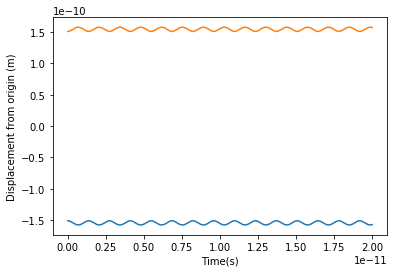

In [46]:
#Set up time arrays
t_steps = 20000
dt = 1e-15 #s
time = np.arange(0, 20000*dt, dt)

#Set up system characteristics
sigma = 0.275e-9 #m
epsilon = 4.968e-22 #J
mass = 3.495e-26 #kg

#Set up arrays to store position, velocity, and acceleration over time
all_pos = np.zeros((t_steps, 2, 2))
all_vel = np.zeros((t_steps, 2, 2))
all_acc = np.zeros((t_steps, 2, 2))

#Set starting positions
all_pos[0,0] = np.array([-0.550*sigma, 0])
all_pos[0,1] = np.array([0.550*sigma, 0])

#Calculate initial force -> acceleration at t=0
force = LJ_force(all_pos[0], 2, sigma, epsilon) 
all_acc[0] = force/mass

#iterate all time steps and perform Verlet Velocity function
for t in range(0, t_steps-1):
    #Update pos based on last acc
    all_pos[t+1,:,:] = all_pos[t]+dt*all_vel[t] + 0.5*dt**2 * all_acc[t]
    #Calculate force and acceleration at the next time step
    force = LJ_force(all_pos[t+1], 2, sigma, epsilon)
    all_acc[t+1] = force/mass
    #Calculate velocities at next time step
    all_vel[t+1,:,:] = all_vel[t] + 0.5*dt*(all_acc[t]+all_acc[t+1])

#Plot results
plt.plot(time, all_pos[:,0,0])
plt.plot(time, all_pos[:,1,0])
plt.xlabel("Time(s)")
plt.ylabel("Displacement from origin (m)")

Text(0.5, 1.0, 'Graph showing positions y against x of particle 1')

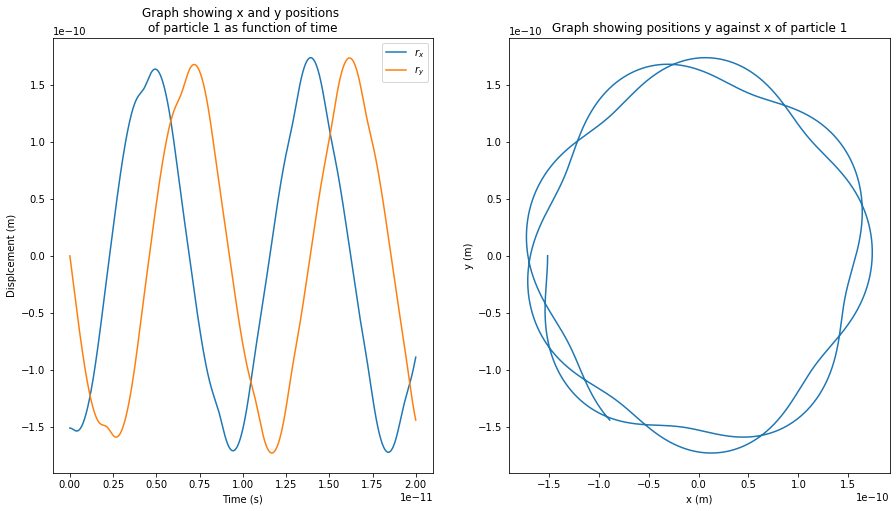

In [47]:

#Set up arrays to store position, velocity, and acceleration over time
all_pos = np.zeros((t_steps, 2, 2))
all_vel = np.zeros((t_steps, 2, 2))
all_acc = np.zeros((t_steps, 2, 2))

#Set starting positions and velocities
all_pos[0,0] = np.array([-0.550*sigma, 0])
all_pos[0,1] = np.array([0.550*sigma, 0])
all_vel[0,0] = np.array([0, -120])
all_vel[0,1] = np.array([0, 120])


#Calculate initial force -> acceleration at t=0
force = LJ_force(all_pos[0], 2, sigma, epsilon) 
all_acc[0] = force/mass


#iterate all time steps and perform Verlet Velocity function
for t in range(0, t_steps-1):
    #Update pos based on last acc
    all_pos[t+1,:,:] = all_pos[t]+dt*all_vel[t] + 0.5*dt**2 * all_acc[t]
    #Calculate force and acceleration at the next time step
    force = LJ_force(all_pos[t+1], 2, sigma, epsilon)
    all_acc[t+1] = force/mass
    #Calculate velocities at next time step
    all_vel[t+1,:,:] = all_vel[t] + 0.5*dt*(all_acc[t]+all_acc[t+1])

#Create 2 subplots as required
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
#Plot x position against time, and y position against time
ax1.plot(time, all_pos[:,0,0], label=r"$r_x$")
ax1.plot(time, all_pos[:,0,1], label=r"$r_y$")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Displcement (m)")
ax1.set_title("Graph showing x and y positions \nof particle 1 as function of time")
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(all_pos[:,0,0], all_pos[:,0,1])
ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
ax2.set_title("Graph showing positions y against x of particle 1")

When the initial velocities are set to 0, the atoms remain in approximately the same position, oscillating between their points of equilibrium.
With the additional velocity in the y axis, we get the same oscillations but with the oscillations being about the radius connecting the two atoms. As the lennard Jones force only acts in the direction of this radius, we expect the magnitude of the velocities to remain the same, as they are perpendicular to the direction of the force. 
This results in a constant angular velocity, and so circular motion.

Text(0.5, 1.0, 'Graph showing $1+x^4$ for 0<=x<=1')

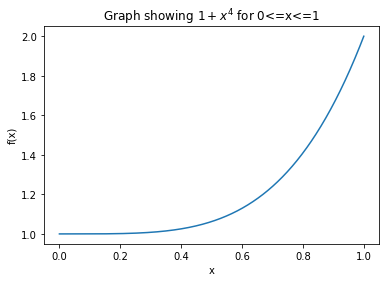

In [48]:
#9a)
def function(x):
    """
    Calculates the function 1+x^4
    Inputs:
        x - the point to evaluate equation at
    Outputs:
        f(x) = 1+x^4
    """
    return 1 + x**4

#Define x range, calculate and plot function over range
x_9a = np.linspace(0, 1, 1000)
f_x = function(x_9a)
plt.plot(x_9a, f_x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Graph showing $1+x^4$ for 0<=x<=1")

For N= 10 our integral evaluates to:  1.15333
For N= 50 our integral evaluates to:  1.1901333279999997
For N= 100 our integral evaluates to:  1.1950333329999996
For N= 500 our integral evaluates to:  1.1990013333328002
For N= 1000 our integral evaluates to:  1.1995003333333003


Text(0.5, 1.0, 'Graph showing the values of the required integral\nfor different values of N')

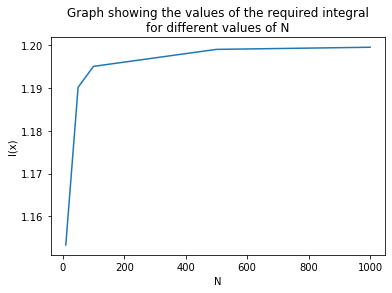

In [49]:
#9b

def rect_int(fun, a, b, N):
    """
    Performs a basic rectangular integration on the function supplied
    Inputs:
        fun - the function to integrate over
        a - the lower bound of the integral
        b - the upper bound of the integral
        N - the number of divisions between a and b to sum over
    Outputs:
        int_sum - the calculated rectangular integral
    """
    int_sum = 0
    dx = (b-a)/N
    for i in range(N):
        int_sum += fun(a + i*dx)
    int_sum *= dx
    return int_sum

#9c
#Create array to hold solutions, define values of N to test over
int_sums = np.zeros(5)
Ns = np.array([10, 50, 100, 500, 1000])
#Iterate over all N, store each sum
for i, N in enumerate(Ns):
    int_sums[i] = rect_int(function, 0, 1, N)
    print("For N=",N, "our integral evaluates to: ", int_sums[i])

#plot results
plt.plot(Ns, int_sums)
plt.ylabel("I(x)")
plt.xlabel("N")
plt.title("Graph showing the values of the required integral\nfor different values of N")

For N= 100 our montecarlo integral evaluates to:  1.28
For N= 500 our montecarlo integral evaluates to:  1.2
For N= 1000 our montecarlo integral evaluates to:  1.196
For N= 5000 our montecarlo integral evaluates to:  1.2076
For N= 10000 our montecarlo integral evaluates to:  1.2018


Text(0.5, 0, 'N')

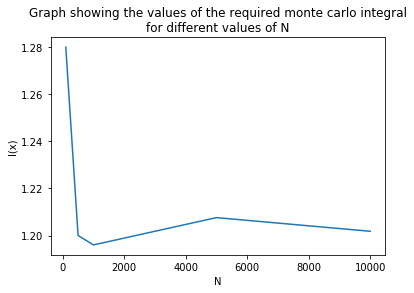

In [50]:
def MonteCarloInt(fun, xl, xh, yl, yh, N):
    """
    Performs the Monte Carlo method of integration
    Inputs:
        fun - The function to find the integral of
        xl, xh - The lower and upper limit of the x range of the integral
        yl, yh - The lower and upper bounds of the y range of the function for the range of x
        N - The number of samples to take
    Outputs:
        The Monte Carlo integral of the given function
    """
    count = 0
    
    for n in range(N):
        ranX = (xh-xl)*np.random.random() + xl
        ranY = (yh-yl)*np.random.random() + yl
        if(ranY <= fun(ranX)):
            count+=1
    
    area = (xh-xl)*(yh-yl)
    return count/N * area

#Define array to store integrals, and define values of N to test over
monte_int = np.zeros(5)
Ns = np.array([100, 500, 1000, 5000, 10000])
for i, N in enumerate(Ns):
    monte_int[i] = MonteCarloInt(function, 0, 1,  0, 2, N)
    print("For N=",N, "our montecarlo integral evaluates to: ", monte_int[i])
    
plt.plot(Ns, monte_int)
plt.title("Graph showing the values of the required monte carlo integral\nfor different values of N")
plt.ylabel("I(x)")
plt.xlabel("N")

We can see that, for a large number of time steps, our results between the rectangular integration and the Monte Carlo method agree.
For this case, the Monte-Carlo method is less efficient, due to the larger number of iterations required.